In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('C:/Users/Teacher-5B773C/Downloads/Online_Retail.xlsx')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.drop(df[df['Quantity']<1].index, inplace=True)

In [7]:
df.drop(df[df['UnitPrice']<0].index, inplace=True)

In [11]:
df['Revenue']=df['Quantity']*df['UnitPrice']

In [12]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [13]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%Y-%m-%d %H:%M')

In [15]:
df['year']=df['InvoiceDate'].dt.year

In [16]:
df_2011=df[df['year']==2011]

In [18]:
df_2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,2011
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,2011
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,2011
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,2011


In [19]:
monthly_revenue=df_2011.groupby(df_2011['InvoiceDate'].dt.month)['Revenue'].sum()

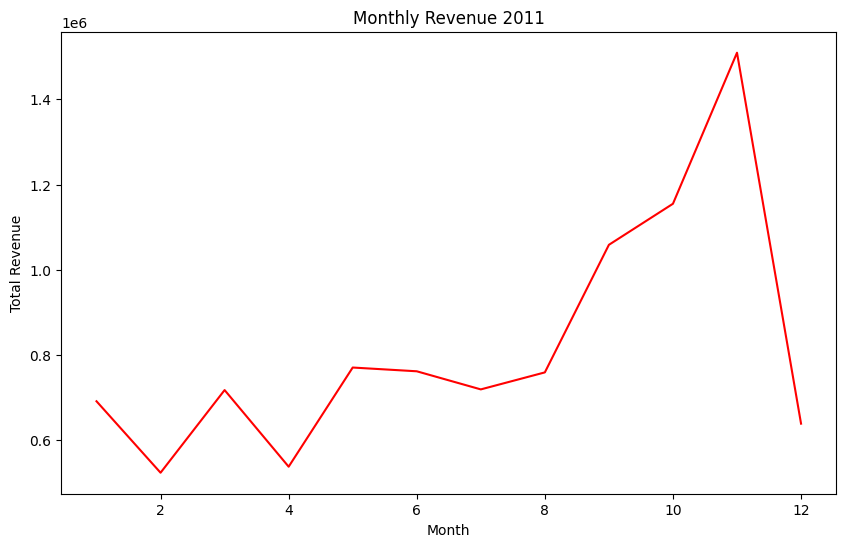

In [24]:
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='line',color='red')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue 2011')
plt.xticks(rotation=0)
plt.show()

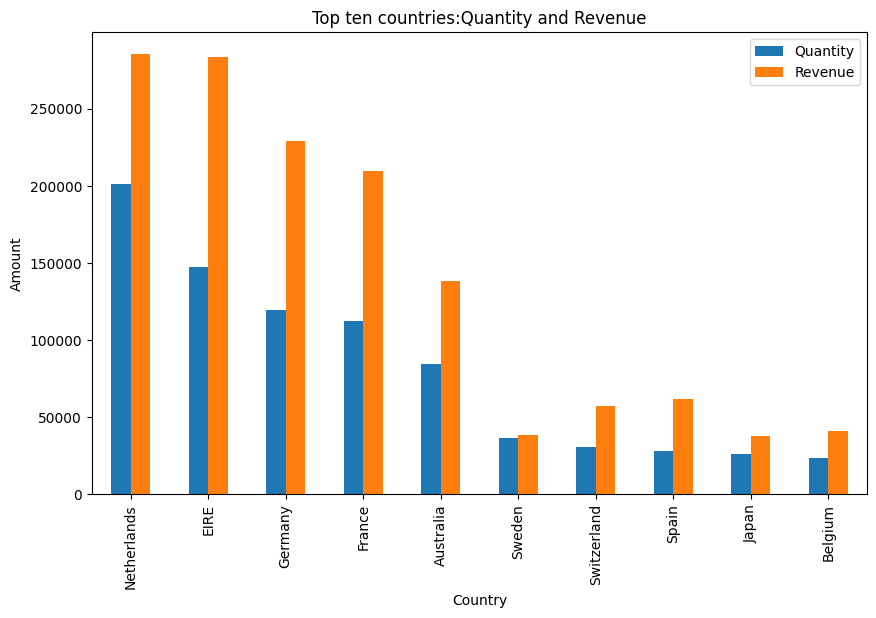

In [25]:
df_filtered=df[df['Country'] !='United Kingdom']
df_filtered.head(10)
grouped_df=df_filtered.groupby('Country').agg({'Quantity':'sum','Revenue':'sum'}).reset_index()
sorted_df=grouped_df.sort_values(by='Quantity',ascending=False)
top_ten_countries=sorted_df.head(10)
ax=top_ten_countries.plot(kind='bar',x='Country',y=['Quantity','Revenue'],figsize=(10,6))
ax.set_ylabel('Amount')
ax.set_xlabel('Country')
ax.set_title('Top ten countries:Quantity and Revenue')
plt.show()

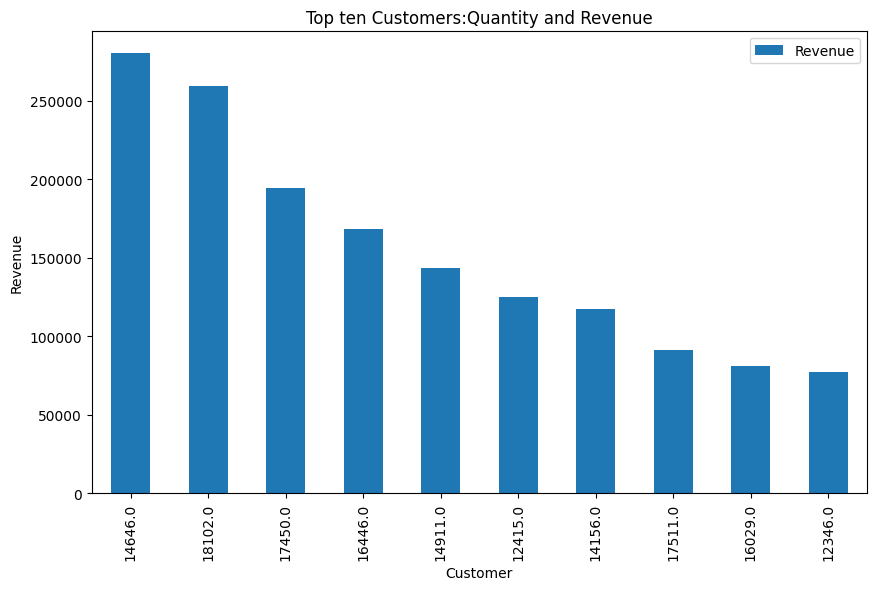

In [26]:
df_filteredc=df[df['CustomerID'] !='']
df_filteredc.head(10)
grouped_dfc=df_filteredc.groupby('CustomerID').agg({'Quantity':'sum','Revenue':'sum'}).reset_index()
sorted_dfc=grouped_dfc.sort_values(by='Revenue',ascending=False)
top_ten_customers=sorted_dfc[sorted_dfc['CustomerID'].isin(sorted_dfc.head(10)['CustomerID'])]
ax=top_ten_customers.plot(kind='bar',x='CustomerID',y=['Revenue'],figsize=(10,6))
ax.set_ylabel('Revenue')
ax.set_xlabel('Customer')
ax.set_title('Top ten Customers:Quantity and Revenue')
plt.show()